<a href="https://colab.research.google.com/github/SachinRajput-SSR/Smart-Grid-Energy-Optimization/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Week 1: Data Loading, Cleaning, Train/Test Split, and Initial Model

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier  # Using Random Forest
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# 1. Load Dataset from GitHub folder (data/raw)
file_path = 'https://raw.githubusercontent.com/SachinRajput-SSR/Smart-Grid-Energy-Optimization/c213e8e7cd25bd5015b9760406144f04fb47b81f/data/raw/smart_grid_stability_augmented.csv'
data = pd.read_csv(file_path)

In [73]:
# 2. Check basic info and missing values
print("Dataset Information:")
print(data.info())
print("\nSample Data:")
print(data.head())
print("\nTarget Distribution:")
print(data['stabf'].value_counts())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB
None

Sample Data:
       tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.9

In [74]:
# 3. Data Cleaning
data = data.drop_duplicates()
print(f"Dataset shape after removing duplicates: {data.shape}")

for col in data.select_dtypes(include=[np.number]).columns:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].median(), inplace=True)

Dataset shape after removing duplicates: (60000, 14)


In [75]:
# 4. Define Inputs and Output
X = data.drop(columns=['stabf'])
y = data['stabf'].map({'stable': 1, 'unstable': 0})  # Binary target

In [76]:
# 5. Train-Test Split (80-20 stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [77]:
# 6. Baseline Model - Random Forest (ITS ONLY FOR SAMPLE)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# 7. Predict and evaluate
y_pred = model.predict(X_test)
print("\nBaseline Random Forest Model Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Baseline Random Forest Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7656
           1       1.00      1.00      1.00      4344

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Accuracy: 1.0


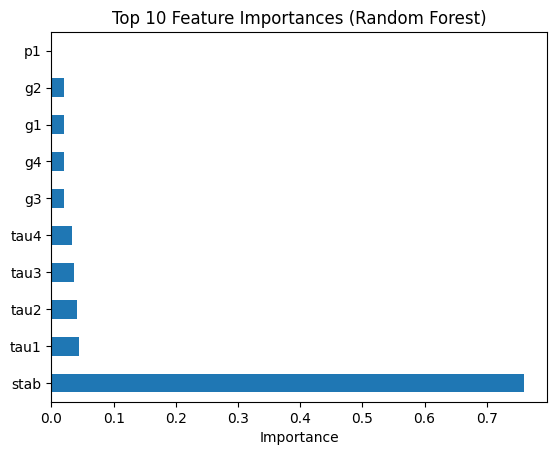

In [79]:
# Show feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()